# MNIST - sklearn: Random Forest Classification

In [2]:
# We study how to recognise the 10 digits by using machine learning.
# we adopt the random forest classifier from sci-kit learn package.
# The score of predicting the test set can attain about 96%. This 
# method is relatively fast.
#
# The data set can be downloaded from kaggle website as follows:
# https://www.kaggle.com/apallekonda/keras-mnist

In [3]:
import numpy as np
import pandas as pd

In [4]:
data=np.load('mnist.npz')

In [5]:
data.keys()

['x_test', 'x_train', 'y_train', 'y_test']

In [6]:
y_train=data.f.y_train
y_test=data.f.y_test
X_train=data.f.x_train
X_test=data.f.x_test

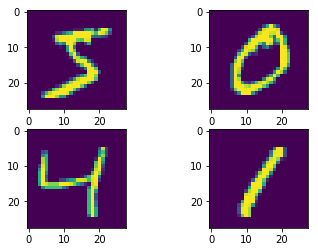

In [7]:
# Visualize several digits' images
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[2])
plt.subplot(224)
plt.imshow(X_train[3])
plt.show()

In [8]:
# Reshape to X to [:,28,28] to [:, 784]
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

# Random Forest Classification

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [10]:
steps=[('clf',RandomForestClassifier())]
pipeline=Pipeline(steps)

In [11]:
param_dist={'clf__n_estimators':np.arange(5,100,5),'clf__max_depth':np.arange(5,100,5)}

In [12]:
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [13]:
clf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95]), 'clf__max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [14]:
clf_cv.best_params_

{'clf__max_depth': 45, 'clf__n_estimators': 75}

In [15]:
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of training set is {}".format(clf_cv.score(X_test,y_test)))

Score of training set is 1.0
Score of training set is 0.9685
